In [48]:
# Две категории данных из файла Volgmed_2013.xls (конкретные категории и данные выбрать в соответствии с вариантом) подвергнуть А/В тестированию:
# сравнить количество пропусков данных на основании точного теста Фишера;
# очистить от выбросов и пропусков и сравнить с помощью t-теста Уэлча;
# сравнить очищенные от выбросов и пропусков категории с помощью U-теста Манна—Уитни.
# Для каждого теста сформулировать, в какую сторону отличаются категории и с каким пи-значением.
# Вывести графики гистограмм и эмпирических функций распределения очищенных данных по категориям.

# Вариант 4. Окружность грудной клетки на вдохе юношей / девушек первого курса.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

# Загрузка данных из файла Excel, начиная с 11 строки, т.к. до этого ненужная инфа
data = pd.read_excel("Volgmed_2013.xlsx", header = None, skiprows = 10)

# Добавление заголовков из 2 строки
headers = pd.read_excel("Volgmed_2013.xlsx", header = 0, nrows = 1).iloc[0].tolist()
data.columns = headers

In [49]:
# Выбор данных
chest_w = data[((data.Пол=='жен') | (data.Пол=='жен.')) & (data.Курс==1)]
chest_w = pd.DataFrame(chest_w['Окружность грудной клетки на вдохе, см'])
chest_m = data[((data.Пол=='муж') | (data.Пол=='муж.')) & (data.Курс==1)]
chest_m = pd.DataFrame(chest_m['Окружность грудной клетки на вдохе, см'])
chest_w = chest_w.rename(columns={'Окружность грудной клетки на вдохе, см' : '1 курс, жен, Окружность грудной клетки на вдохе, см'})
chest_m = chest_m.rename(columns={'Окружность грудной клетки на вдохе, см' : '1 курс, муж, Окружность грудной клетки на вдохе, см'})

In [50]:
print(chest_w)
print(chest_m)

     1 курс, жен, Окружность грудной клетки на вдохе, см
0                                                    91 
3                                                    89 
6                                                    88 
9                                                    85 
12                                                   94 
...                                                 ... 
3943                                                NaN 
3945                                                 89 
3947                                                 85 
3949                                                 88 
3951                                                 87 

[765 rows x 1 columns]
     1 курс, муж, Окружность грудной клетки на вдохе, см
381                                                  89 
384                                                  90 
387                                                 121 
390                                                  89 
393    

In [51]:
# Сравнение количества пропусков данных на основании точного теста Фишера
nan_count1 = np.sum(pd.isna(chest_w.to_numpy()))
nan_count2 = np.sum(pd.isna(chest_m.to_numpy()))
table = np.array([[len(chest_w)-nan_count1,nan_count1],
                  [len(chest_m)-nan_count2,nan_count2]])
print(stats.fisher_exact(table).statistic)
print(stats.fisher_exact(table).pvalue)

1.6544117647058822
0.24681811650741647


In [52]:
# Очистка от выбросов и пропусков
def data_cleanup(data):
    data = data.dropna()
    data_array = data.to_numpy()
    q_025 = np.quantile(data_array[:,0],0.25)
    q_075 = np.quantile(data_array[:,0],0.75)
    iqd = q_075 - q_025
    upper_limit = q_075 + 1.5 * iqd
    lower_limit = q_025 - 1.5 * iqd
    def is_value_fit(value):
        return (lower_limit < value < upper_limit)
    return data.iloc[:,0].apply(is_value_fit)
    
chest_w_clean = data_cleanup(chest_w)
chest_m_clean = data_cleanup(chest_m)

In [53]:
# Сравнение с помощью t-теста Уэлча
print(stats.ttest_ind(chest_w_clean, chest_m_clean, equal_var=False).statistic)
print(stats.ttest_ind(chest_w_clean, chest_m_clean, equal_var=False).pvalue)

-1.6579272871399564
0.09780503217334707


In [54]:
# Сравнение очищенных от выбросов и пропусков категории с помощью U-теста Манна—Уитни.
print(stats.mannwhitneyu(chest_w_clean, chest_m_clean).statistic)
print(stats.mannwhitneyu(chest_w_clean, chest_m_clean).pvalue)

100203.0
0.15325948244961696


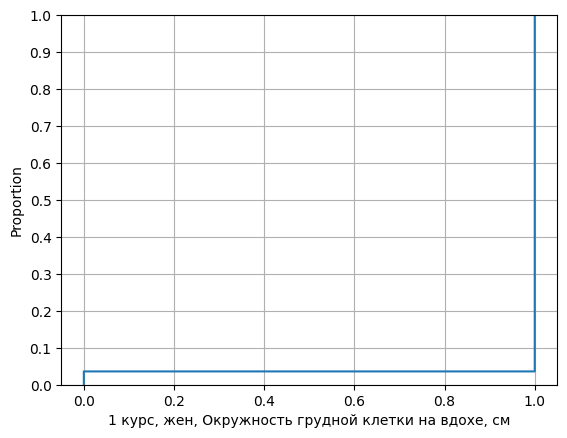

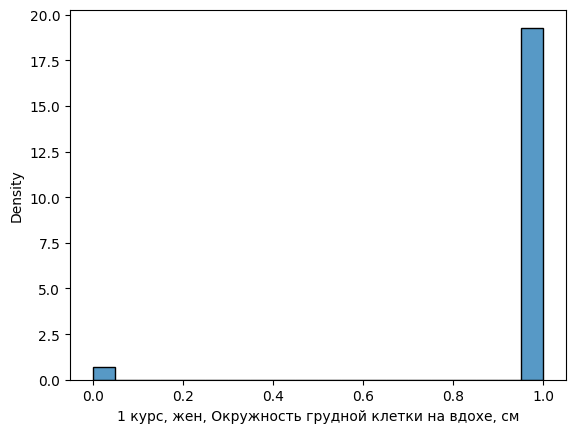

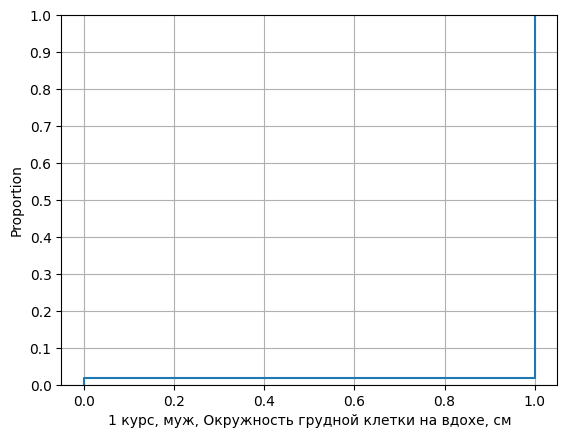

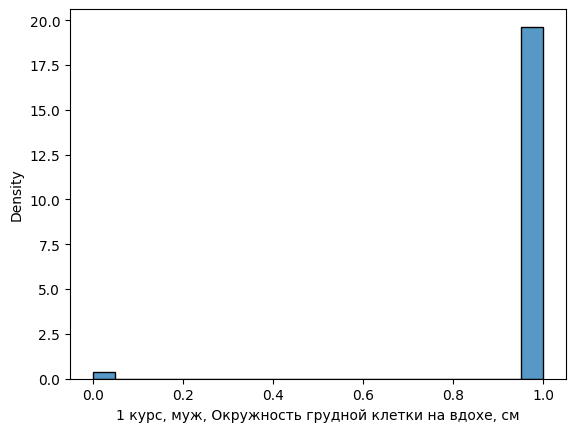

In [55]:
# Формулировка для каждого теста, в какую сторону отличаются категории и с каким пи-значением.
# Вывод графиков гистограмм и эмпирических функций распределения очищенных данных по категориям.
# Девушки
ax = sns.ecdfplot(chest_w_clean)
ax.axes.set_yticks(np.arange(start=0, stop=1.1, step=0.1))
ax.grid()
plt.show()
sns.histplot(chest_w_clean, bins=20, kde=False, stat="density")
plt.show()
# Юноши
ax = sns.ecdfplot(chest_m_clean)
ax.axes.set_yticks(np.arange(start=0, stop=1.1, step=0.1))
ax.grid()
plt.show()
sns.histplot(chest_m_clean, bins=20, kde=False, stat="density")
plt.show()